[View in Colaboratory](https://colab.research.google.com/github/PhysicsTeacher13/Working/blob/master/salt_identification_demo.ipynb)

In [1]:
# dependency installs !
!pip install imageio
!pip install torch
!pip install kaggle
!pip install ipywidgets

    100% |████████████████████████████████| 3.3MB 8.0MB/s 
  Running setup.py bdist_wheel for imageio ... - \ | done
  Stored in directory: /root/.cache/pip/wheels/e0/43/31/605de9372ceaf657f152d3d5e82f42cf265d81db8bbe63cde1
Successfully built imageio
    100% |████████████████████████████████| 519.5MB 27kB/s 
tcmalloc: large alloc 1073750016 bytes == 0x59b6a000 @  0x7fcd365a21c4 0x46d6a4 0x5fcbcc 0x4c494d 0x54f3c4 0x553aaf 0x54e4c8 0x54f4f6 0x553aaf 0x54efc1 0x54f24d 0x553aaf 0x54efc1 0x54f24d 0x553aaf 0x54efc1 0x54f24d 0x551ee0 0x54e4c8 0x54f4f6 0x553aaf 0x54efc1 0x54f24d 0x551ee0 0x54efc1 0x54f24d 0x551ee0 0x54e4c8 0x54f4f6 0x553aaf 0x54e4c8
    100% |████████████████████████████████| 61kB 4.2MB/s 
    100% |████████████████████████████████| 235kB 7.5MB/s 
  Running setup.py bdist_wheel for kaggle ... - \ done
  Stored in directory: /root/.cache/pip/wheels/44/2c/df/22a6eeb780c36c28190faef6252b739fdc47145fd87a6642d4
  Running setup.py bdist_wheel for python-slugify ... - d

In [0]:
#import dependances 
import os
import numpy as np
import imageio
import matplotlib.pyplot as plt
import pandas as pd
import torch
from torch.utils import data

In [3]:
#upload the kaggle credentials 
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"physicsteacher13","key":"2757ed5f36d055a05b3700c4c2e7b878"}'}

In [4]:
# is it there ?
ls -1ha kaggle.json

kaggle.json


In [0]:
# File configuation 
!mkdir -p ~/.kaggle/
!cp kaggle.json ~/.kaggle/

!chmod 600 ~/.kaggle/kaggle.json


In [6]:
# Download our dataset
!kaggle competitions download -c tgs-salt-identification-challenge

  0% 0.00/322k [00:00<?, ?B/s]
100% 322k/322k [00:00<00:00, 71.8MB/s]
  0% 0.00/264k [00:00<?, ?B/s]
100% 264k/264k [00:00<00:00, 74.7MB/s]
  0% 0.00/922k [00:00<?, ?B/s]
100% 922k/922k [00:00<00:00, 122MB/s]
 95% 155M/163M [00:01<00:00, 117MB/s] 
100% 163M/163M [00:01<00:00, 159MB/s]
 71% 27.0M/37.9M [00:00<00:00, 89.9MB/s]
100% 37.9M/37.9M [00:00<00:00, 153MB/s] 


In [7]:
# Unzip
!ls
!unzip train.zip

depths.csv   sample_data	    test.zip   train.zip
kaggle.json  sample_submission.csv  train.csv
Archive:  train.zip
   creating: images/
   creating: masks/
  inflating: images/8d08955cdf.png   
  inflating: images/e045664b46.png   
  inflating: images/4989c6509e.png   
  inflating: images/fff4eb4941.png   
  inflating: images/3a310860a3.png   
  inflating: images/7a696bb878.png   
  inflating: images/8d3ee9356b.png   
  inflating: images/213e0a9f7b.png   
  inflating: images/78f17697f2.png   
  inflating: images/bd20d18369.png   
  inflating: images/de08c5a3b7.png   
  inflating: images/f06ef6c8b7.png   
  inflating: images/b2d02516e1.png   
  inflating: images/5edb37f5a8.png   
  inflating: images/b1f0e104f5.png   
  inflating: images/40e8e14e60.png   
  inflating: images/6e1444d88d.png   
  inflating: images/f342603c76.png   
  inflating: images/7ba58ee1be.png   
  inflating: images/14a89a1840.png   
  inflating: images/4319885cf1.png   
  inflating: images/bb697642ae.png   
  infla

In [0]:
# Lets Create a class to represent our dataset
class TGSSaltDataset(data.Dataset):
  
  def __init__(self, root_path, file_list):
    self.root_path = root_path
    self.file_list = file_list
    
  def __len__(self):
    return len(self.file_list)
  
  def __getitem__(self, index):
    file_id = self.file_list[index]
    # image folder+path
    image_folder = os.path.join(self.root_path, 'images')
    image_path = os.path.join(image_folder, file_id + '.png')
    
    #label folder+path
    mask_folder = os.path.join(self.root_path, 'masks')
    mask_path = os.path.join(mask_folder, file_id + '.png')
    
    # read it
    image = np.array(imageio.imread(image_path), dtype=np.uint8)
    mask = np.array(imageio.imread(mask_path), dtype=np.uint8)
    
    return image, mask

In [0]:
# init our new class dataset
train_mask = pd.read_csv('train.csv')
depth = pd.read_csv('depths.csv')

train_path = './'
file_list = list(train_mask['id'].values)
dataset = TGSSaltDataset(train_path, file_list)



In [0]:
# function to visualize the image

def plot2x2Array(image, mask):
  # invoke matplotlib!
  f, axarr = plt.subplots(1,2)
  axarr[0].imshow(image)
  axarr[1].imshow(mask)
  axarr[0].grid()
  axarr[1].grid()
  axarr[0].set_title('Image')
  axarr[1].set_title('Mask')
  
  

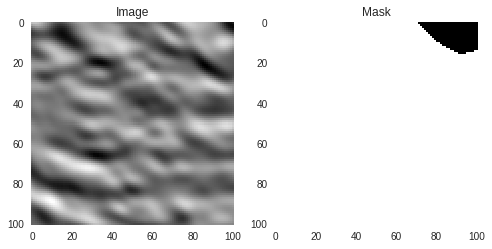

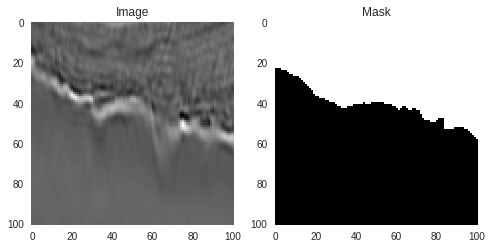

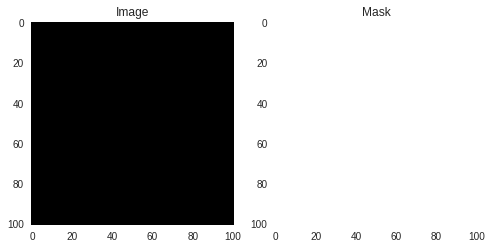

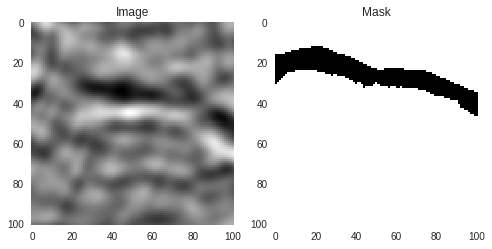

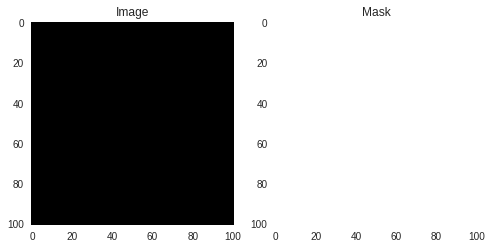

In [11]:
# print the image
for i in range(5):
  image, mask = dataset[np.random.randint(0, len(dataset))]
  plot2x2Array(image, mask)

Text(0.5,1,'depths distribution')

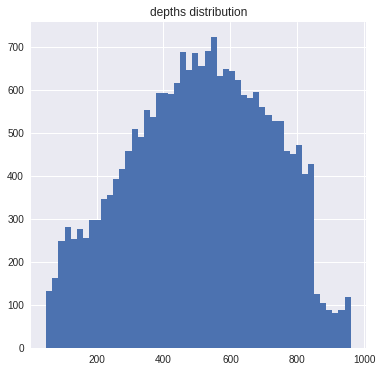

In [12]:
# plot the distrubution of depths
plt.figure(figsize = (6,6))
plt.hist(depth['z'], bins = 50)
plt.title('depths distribution')

In [0]:
# convert run ;ength encoding to image that can be input into our model
def rleToMask(rleString, height, width):
  # width, height
  rows, cols, = height, width
  try:
    rleNumbers = [int(numstring) for numstring in rleString.split(' ')]
    rlePairs = np.array(rleNumbers).reshape(-1,2)
    img = np.zeros(row*cols, dtype=np.unit8)
    for index, length in rlePairs:
      index -=1
      img[index:index+length] =255
      
    img = img.reshape(cols, rows)
    img = img.T
    
  except:
    img = np.zeros((cols, rows))
    
  return img

In [0]:
# function for measuring how salty an image is 
def salt_proportion(imgArray):
  try: 
    unique, counts = np.unique(imgArray, return_counts=True)
    return counts[1]/10201. # Total pixels 101*101 = 10201
    
  except:
    return 0.0

In [0]:
# prepare to merge depth
train_mask['mask'] = train_mask['rle_mask'].apply(lambda x: rleToMask(x, 101, 101))
train_mask['salt_proportion'] = train_mask['mask'].apply(lambda x: salt_proportion(x))

In [16]:
# merge it
merged = train_mask.merge(depth, how = 'left')
merged.head()

,id,rle_mask,mask,salt_proportion,z
0,575d24d81d,NaN,"[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...",0.0,843
1,a266a2a9df,5051 5151,"[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...",0.0,794
2,75efad62c1,9 93 109 94 210 94 310 95 411 95 511 96 612 96...,"[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...",0.0,468
3,34e51dba6a,48 54 149 54 251 53 353 52 455 51 557 50 659 4...,"[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...",0.0,727
4,4875705fb0,1111 1 1212 1 1313 1 1414 1 1514 2 1615 2 1716...,"[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...",0.0,797


Text(0.5,1,'Proportion of Salt vs Depth')

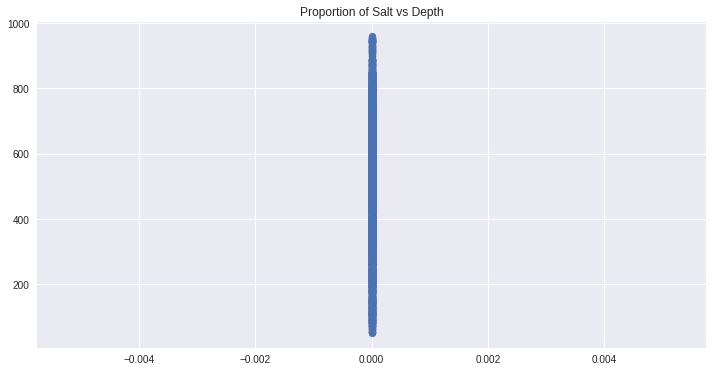

In [17]:
# show proportions of salt vs depth
plt.figure(figsize = (12, 6))
plt.scatter(merged['salt_proportion'], merged['z'])
plt.title('Proportion of Salt vs Depth')

In [0]:
# just how correlated is it ?
# print("Correlation: ", np.corrcoef(merged['salt_proportion'], merged['z']) [0, 1])

In [19]:
from keras.models import Model, load_model
from keras.layers import Input
from keras.layers.core import Lambda, RepeatVector, Reshape
from keras.layers.convolutional import Conv2D, Conv2DTranspose
from keras.layers.pooling import MaxPooling2D
from keras.layers.merge import concatenate
from keras.callbacks import EarlyStopping, ModelCheckpoint, ReduceLROnPlateau
from keras import backend as K

Using TensorFlow backend.


In [0]:
im_width = 128
im_height = 128 
border = 5
im_chan = 2 # Number of channels: first is original and second is cumsum(axis=0)
n_features = 1 # Number of extra features like depth
#path_train = '../input/train/'
#path_test = '../input/test/'

In [21]:
# Build U-Net Model

input_img = Input((im_height, im_width, im_chan), name='img')
input_features = Input((n_features, ), name='feat')

c1 = Conv2D(8, (3, 3), activation='relu', padding='same') (input_img)
c1 = Conv2D(8, (3, 3), activation='relu', padding='same') (c1)
p1 = MaxPooling2D((2, 2)) (c1)

c2 = Conv2D(16, (3, 3), activation='relu', padding='same') (p1)
c2 = Conv2D(16, (3, 3), activation='relu', padding='same') (c2)
p2 = MaxPooling2D((2, 2)) (c2)

c3 = Conv2D(32, (3, 3), activation='relu', padding='same') (p2)
c3 = Conv2D(32, (3, 3), activation='relu', padding='same') (c3)
p3 = MaxPooling2D((2, 2)) (c3)

c4 = Conv2D(64, (3, 3), activation='relu', padding='same') (p3)
c4 = Conv2D(64, (3, 3), activation='relu', padding='same') (c4)
p4 = MaxPooling2D((2, 2)) (c4)

# Join features information in the depthest layer
f_repeat = RepeatVector(8*8)(input_features)
f_conv = Reshape((8, 8, n_features))(f_repeat)
p4_feat = concatenate([p4, f_conv], -1) # Lowest level of the data!

# decoder layer
c5 = Conv2D(128, (3, 3), activation='relu', padding='same') (p4_feat)
c5 = Conv2D(128, (3, 3), activation='relu', padding='same') (c5)

u6 = Conv2DTranspose(64, (2, 2), strides=(2,2), padding='same') (c5)
u6 = concatenate([u6, c4]) # skip conection
c6 = Conv2D(64, (3, 3), activation='relu', padding='same') (u6)
c6 = Conv2D(64, (3, 3), activation='relu', padding='same') (c6)

u7 = Conv2DTranspose(32, (2, 2), strides=(2,2), padding='same') (c6)
u7 = concatenate([u7, c3]) # skip conection
c7 = Conv2D(32, (3, 3), activation='relu', padding='same') (u7)
c7 = Conv2D(32, (3, 3), activation='relu', padding='same') (c7)

u8 = Conv2DTranspose(16, (2, 2), strides=(2,2), padding='same') (c7)
u8 = concatenate([u8, c2]) # ship conection
c8 = Conv2D(16, (3, 3), activation='relu', padding='same') (u8)
c8 = Conv2D(16, (3, 3), activation='relu', padding='same') (c8)

u9 = Conv2DTranspose(8, (2, 2), strides=(2,2), padding='same') (c8)
u9 = concatenate([u9, c1], axis=3) # skip conection
c9 = Conv2D(8, (3, 3), activation='relu', padding='same') (u9)
c9 = Conv2D(8, (3, 3), activation='relu', padding='same') (c9)

outputs = Conv2D(1, (1, 1), activation='sigmoid') (c9)

model = Model(inputs=[input_img, input_features], outputs=[outputs])
model.compile(optimizer='adam', loss='binary_crossentropy') #, metrics=[mean_]
model.summary()









__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
img (InputLayer)                (None, 128, 128, 2)  0                                            
__________________________________________________________________________________________________
conv2d_1 (Conv2D)               (None, 128, 128, 8)  152         img[0][0]                        
__________________________________________________________________________________________________
conv2d_2 (Conv2D)               (None, 128, 128, 8)  584         conv2d_1[0][0]                   
__________________________________________________________________________________________________
max_pooling2d_1 (MaxPooling2D)  (None, 64, 64, 8)    0           conv2d_2[0][0]                   
__________________________________________________________________________________________________
conv2d_3 (

In [22]:
# reference notes
import sys
from tqdm import tqdm
from keras.preprocessing.image import ImageDataGenerator, array_to_img, img_to_array, load_img
from skimage.transform import resize

train_ids = next(os.walk(train_path+"images")) [2]

# Get and resize train images and masks
X = np.zeros((len(train_ids), im_height, im_width, im_chan), dtype=np.float32)
y = np.zeros((len(train_ids), im_height, im_width, 1), dtype=np.float32)
X_feat = np.zeros((len(train_ids), n_features), dtype=np.float32)
print('Getting and resizing train images and masks ...')
sys.stdout.flush()
for n, id_ in tqdm(enumerate(train_ids), total=len(train_ids)):
  path = train_path
  
  # Depth
  #X_feat[n] = depth.loc[id_.replace('.png', ''), 'z']
  
  # Load X
  img = load_img(path + '/images/' + id_, grayscale=True)
  x_img = img_to_array(img)
  x_img = resize(x_img, (128, 128, 1), mode='constant', preserve_range=True)
  
  # Create cumsum x
  x_center_mean = x_img[border:-border, border:-border].mean()
  x_csum = (np.float32(x_img)-x_center_mean).cumsum(axis=0)
  x_csum -= x_csum[border:-border, border:-border].mean()
  x_csum /= max(1e-3, x_csum[border:-border, border:-border].std())
  
  # Load Y
  mask = img_to_array(load_img(path + '/masks/' + id_, grayscale=True))
  mask = resize(mask, (128, 128, 1), mode='constant', preserve_range=True)
  
  # Save images
  X[n, ..., 0] = x_img.squeeze() / 255
  X[n, ..., 1] = x_csum.squeeze()
  y[n] = mask / 255
  
print('Done!')
  


Getting and resizing train images and masks ...


100%|██████████| 4000/4000 [00:17<00:00, 223.84it/s]

Done!


In [0]:

# reference notes
from sklearn.model_selection import train_test_split

X_train, X_valid, X_feat_train, X_feat_valid, y_train, y_valid = train_test_split(X, X_feat, y, test_size=0.15, random_state=42)

In [24]:
# Callbacks
callbacks = [
    EarlyStopping(patience=5, verbose=1),
    ReduceLROnPlateau(patience=3, verbose=1),
    ModelCheckpoint('model-tgs-salt-1.h5', verbose=1, save_best_only=True, save_weights_only=True)
]

results = model.fit({'img': X_train, 'feat': X_feat_train}, y_train, batch_size=16, epochs=50, 
                    callbacks=callbacks, validation_data=({'img': X_valid, 'feat': X_feat_valid},
                                                          y_valid))

Train on 3400 samples, validate on 600 samples
Epoch 1/50
3400/3400 [==============================] - 266s 78ms/step - loss: 0.5207 - val_loss: 0.4803

Epoch 00001: val_loss improved from inf to 0.48027, saving model to model-tgs-salt-1.h5
Epoch 2/50
3400/3400 [==============================] - 262s 77ms/step - loss: 0.4055 - val_loss: 0.3937

Epoch 00002: val_loss improved from 0.48027 to 0.39368, saving model to model-tgs-salt-1.h5
Epoch 3/50
3400/3400 [==============================] - 260s 77ms/step - loss: 0.3501 - val_loss: 0.3647

Epoch 00003: val_loss improved from 0.39368 to 0.36474, saving model to model-tgs-salt-1.h5
Epoch 4/50
3400/3400 [==============================] - 264s 78ms/step - loss: 0.2837 - val_loss: 0.2889

Epoch 00004: val_loss improved from 0.36474 to 0.28888, saving model to model-tgs-salt-1.h5
Epoch 5/50
3400/3400 [==============================] - 263s 77ms/step - loss: 0.2657 - val_loss: 0.2554

Epoch 00005: val_loss improved from 0.28888 to 0.25536, sav